# Analisis Exploratorio de Datos de Call Center

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import unicodedata

In [3]:
df = pd.read_excel('Datos_de _servicio.xlsx')
df.head(10)

,Id Llamada,Fecha,Asistente,Área,Respondido - Resuelto (S/N),Velocidad de respuesta,Duración de la llamada,Duración con asistente en segundos,Índice de satisfacción
0,ID0001,2023-03-22,Juan D.,Ventas,SÍ - S,109,00:02:23,143,2
1,ID0002,2023-03-17,Marcelo F.,RECLAMOS,SÍ - N,70,00:04:02,242,3
2,ID0003,2023-03-18,Leandro C.,Ventas,SÍ - S,10,00:02:11,131,3
3,ID0004,2023-03-09,Leandro C.,Ventas,SÍ - S,53,00:00:37,37,2
4,ID0007,2023-03-01,Marina Z.,Cancelaciones,SÍ - S,24,00:03:40,220,2
5,ID0010,2023-03-22,Marcelo F.,Ventas,SÍ - S,78,00:01:03,63,3
6,ID0012,2023-03-13,Ana S.,Cancelaciones,SÍ - S,50,00:00:31,31,1
7,ID0013,2023-03-27,Marina Z.,Cancelaciones,SÍ - S,84,00:03:33,213,3
8,ID0014,2023-03-25,Marina Z.,Ventas,SÍ - S,89,00:05:43,343,3
9,ID0015,2023-03-12,Ana S.,Intercambios,SÍ - N,48,00:03:47,227,1


In [4]:
# Eliminamos 2 primeros caracteres
df['Id Llamada'] = df['Id Llamada'].str.slice(start=2)

# Dividimos en 2 la columna
df[['Respondido', 'Resuelto']] = df['Respondido - Resuelto (S/N)'].str.split(' - ', expand=True)
df = df.drop(columns=['Respondido - Resuelto (S/N)'])

# Normalizamos los valores en la columna Área
df['Área'] = df['Área'].str.title()

# Normalizamos titulos de columnas
def remove_accents(input_str):
    return ''.join(c for c in unicodedata.normalize('NFKD', input_str) if not unicodedata.combining(c))

df.columns = [remove_accents(col) for col in df.columns]

df.head()


,Id Llamada,Fecha,Asistente,Area,Velocidad de respuesta,Duracion de la llamada,Duracion con asistente en segundos,Indice de satisfaccion,Respondido,Resuelto
0,0001,2023-03-22,Juan D.,Ventas,109,00:02:23,143,2,SÍ,S
1,0002,2023-03-17,Marcelo F.,Reclamos,70,00:04:02,242,3,SÍ,N
2,0003,2023-03-18,Leandro C.,Ventas,10,00:02:11,131,3,SÍ,S
3,0004,2023-03-09,Leandro C.,Ventas,53,00:00:37,37,2,SÍ,S
4,0007,2023-03-01,Marina Z.,Cancelaciones,24,00:03:40,220,2,SÍ,S


In [5]:
# Verificamos si existen valores nulos
df.isnull().sum()

Id Llamada                            0
Fecha                                 0
Asistente                             0
Area                                  0
Velocidad de respuesta                0
Duracion de la llamada                0
Duracion con asistente en segundos    0
Indice de satisfaccion                0
Respondido                            0
Resuelto                              0
dtype: int64

In [6]:
df.describe()

,Fecha,Velocidad de respuesta,Duracion con asistente en segundos,Indice de satisfaccion
count,1009,1009.000000,1009.000000,1009.000000
mean,2023-03-15 15:19:05.292368640,66.682854,223.778989,3.402379
min,2023-03-01 00:00:00,10.000000,30.000000,1.000000
25%,2023-03-08 00:00:00,40.000000,127.000000,3.000000
50%,2023-03-15 00:00:00,67.000000,228.000000,3.000000
75%,2023-03-23 00:00:00,95.000000,324.000000,4.000000
max,2023-03-31 00:00:00,125.000000,419.000000,5.000000
std,NaN,33.342953,113.007689,1.201287


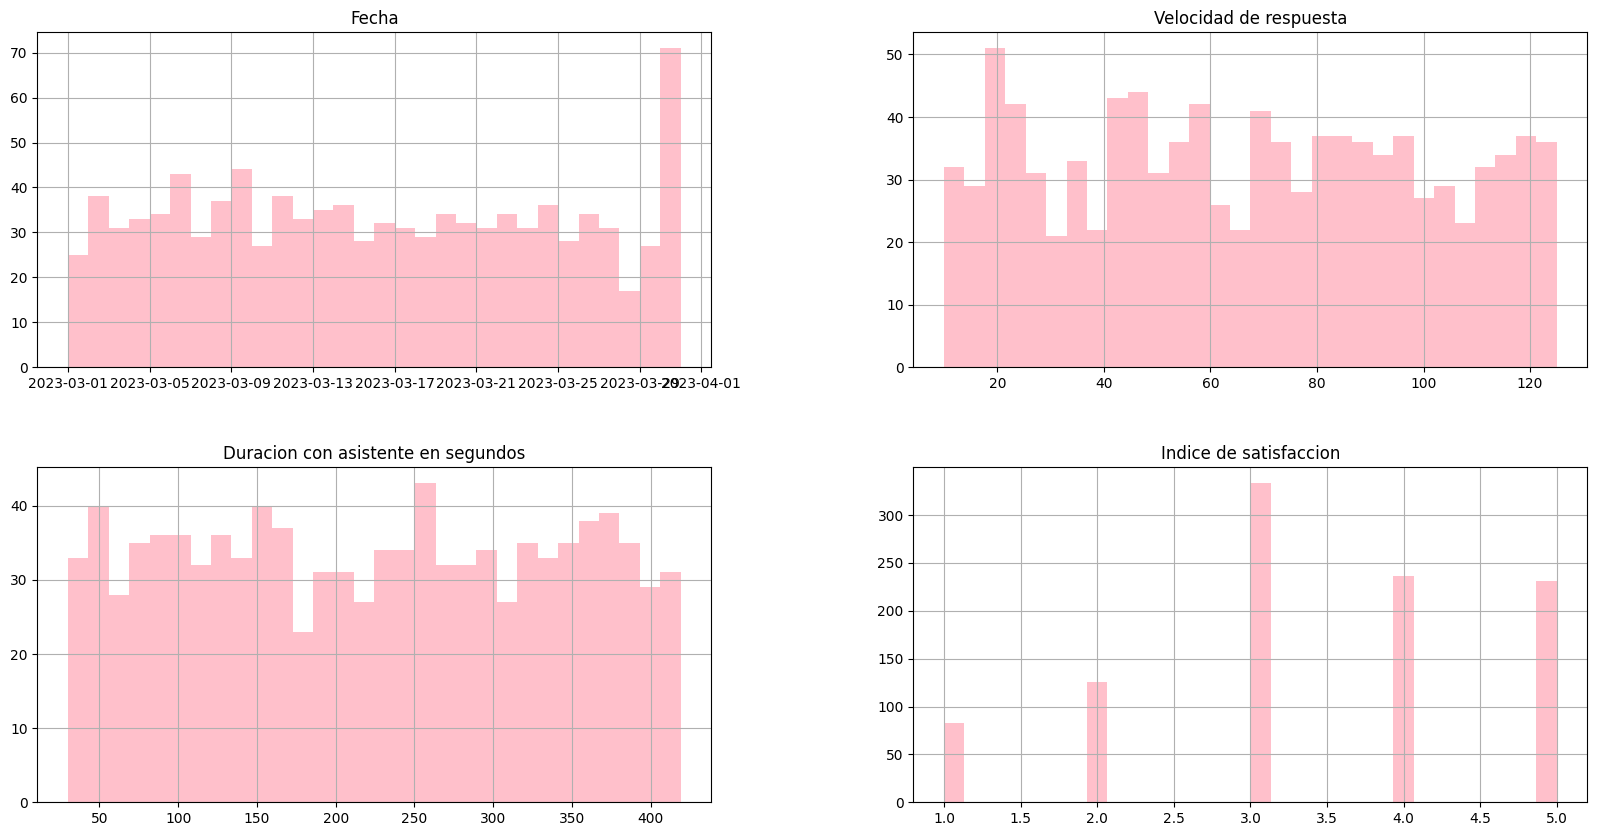

In [7]:
# Vemos las distribución de las variables
df.hist(figsize=(20, 10), bins=30, color='pink')
plt.show()

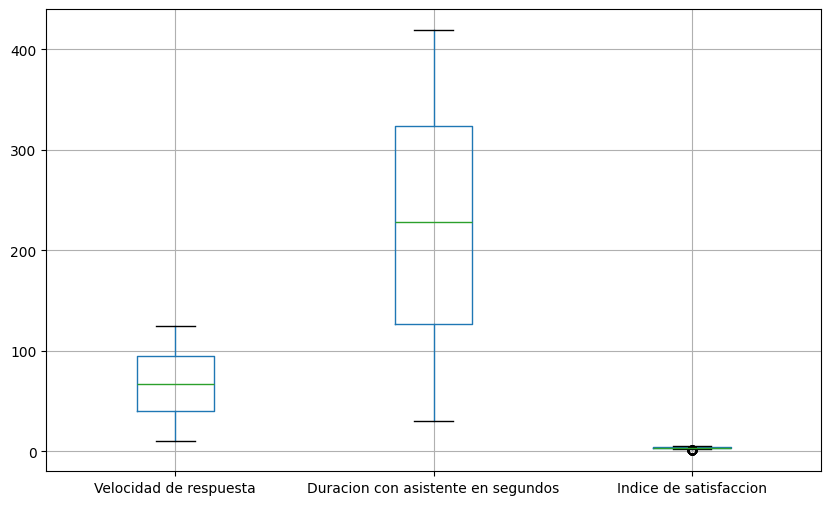

In [8]:
# Verificamos si hay valores atípicos
df.boxplot(figsize=(10, 6))
plt.show()

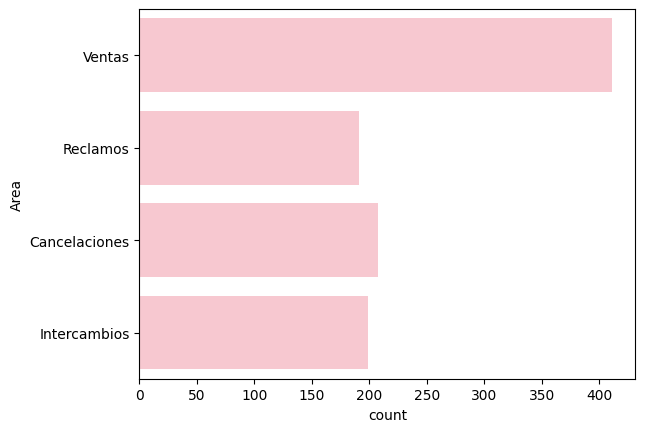

In [9]:
# Verificamos valores en columna Área
sns.countplot(y='Area', data=df, color='pink')
plt.show()

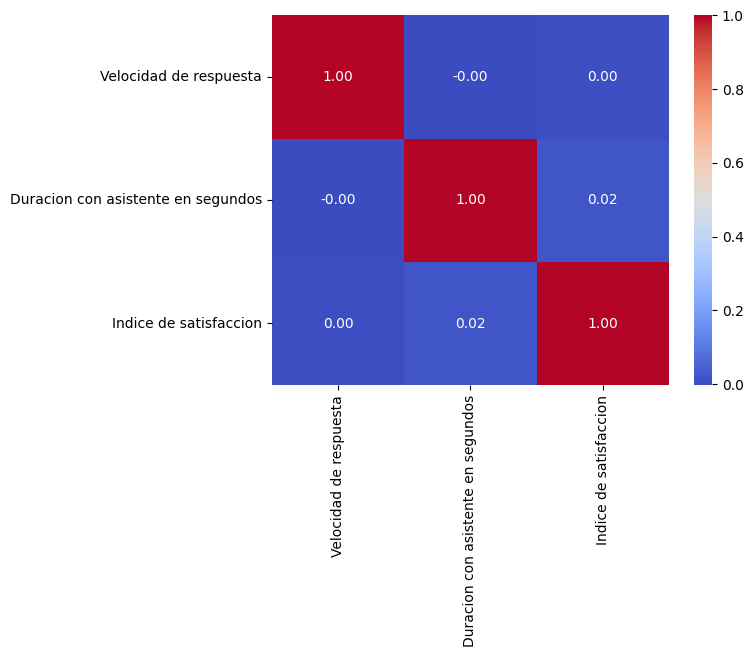

In [10]:
numeric_df = df.select_dtypes(include=[float, int])

# Calcula la matriz de correlación
corr_matrix = numeric_df.corr()

# Visualiza la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [11]:
# Exportamos el dataframe a csv
df.to_csv('datos_servicios_limpio.csv', index=True)